In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime
import time
import swifter

In [2]:
data = pd.read_csv('./modelready_data.csv')

In [3]:
data.head()

,UserId,Category,Country,Device,Genre,OS,ProgramType,State,VideoId,AppLaunchedFrequency,RegistrationFrequency,UTMVisitedFrequency,VideoStartedFrequency,VideoDetailsFrequency,AppUninstalledFrequency,LastSeen(in Hours),LastEvent(in 48H),WatchedVideo,WatchedVideo(in 48H)
0,0000146e97c32d369268e5ba5f4b907c,vod,1,1,Drama,1,TV Shows,36,f053c42e98d50e06532ce8d65afb3ab3,14.0,1.0,4.0,1.0,5.0,1.0,0,Yes,1,1
1,00001e3213a2159ed06f1db689c54fbb,vod,40,1,Comedy,1,Movies,33,94e0e078a2107fd19e6b375e193c3a93,4.0,1.0,1.0,1.0,4.0,1.0,0,Yes,1,1
2,00004010d92c2f13b824237bc323d58b,vod,40,2,Anime,1,TV Shows,33,edfe3711d865215486344ee2a545c0c1,1.0,1.0,2.0,1.0,4.0,1.0,0,Yes,1,1
3,000076c7bbdf7e4568777134cc4bec56,vod,1,1,Drama,2,TV Shows,35,f0961889cad44180693b249ad0718b78,9.0,1.0,1.0,9.0,4.0,1.0,0,Yes,0,0
4,0000e560394fce891dcf80218793d181,linear,1,1,Anime,1,Channels,40,7215ee9c7d9dc229d2921a40e899ec5f,10.0,1.0,1.0,9.0,17.0,1.0,0,Yes,1,1


In [4]:
data = data.drop('VideoId',axis=1)
data.head()

,UserId,Category,Country,Device,Genre,OS,ProgramType,State,AppLaunchedFrequency,RegistrationFrequency,UTMVisitedFrequency,VideoStartedFrequency,VideoDetailsFrequency,AppUninstalledFrequency,LastSeen(in Hours),LastEvent(in 48H),WatchedVideo,WatchedVideo(in 48H)
0,0000146e97c32d369268e5ba5f4b907c,vod,1,1,Drama,1,TV Shows,36,14.0,1.0,4.0,1.0,5.0,1.0,0,Yes,1,1
1,00001e3213a2159ed06f1db689c54fbb,vod,40,1,Comedy,1,Movies,33,4.0,1.0,1.0,1.0,4.0,1.0,0,Yes,1,1
2,00004010d92c2f13b824237bc323d58b,vod,40,2,Anime,1,TV Shows,33,1.0,1.0,2.0,1.0,4.0,1.0,0,Yes,1,1
3,000076c7bbdf7e4568777134cc4bec56,vod,1,1,Drama,2,TV Shows,35,9.0,1.0,1.0,9.0,4.0,1.0,0,Yes,0,0
4,0000e560394fce891dcf80218793d181,linear,1,1,Anime,1,Channels,40,10.0,1.0,1.0,9.0,17.0,1.0,0,Yes,1,1


In [5]:
data['WatchedVideo(in 48H)'].value_counts()

1    223637
0     40146
Name: WatchedVideo(in 48H), dtype: int64

Highly Correlated Variables


Series([], dtype: float64)

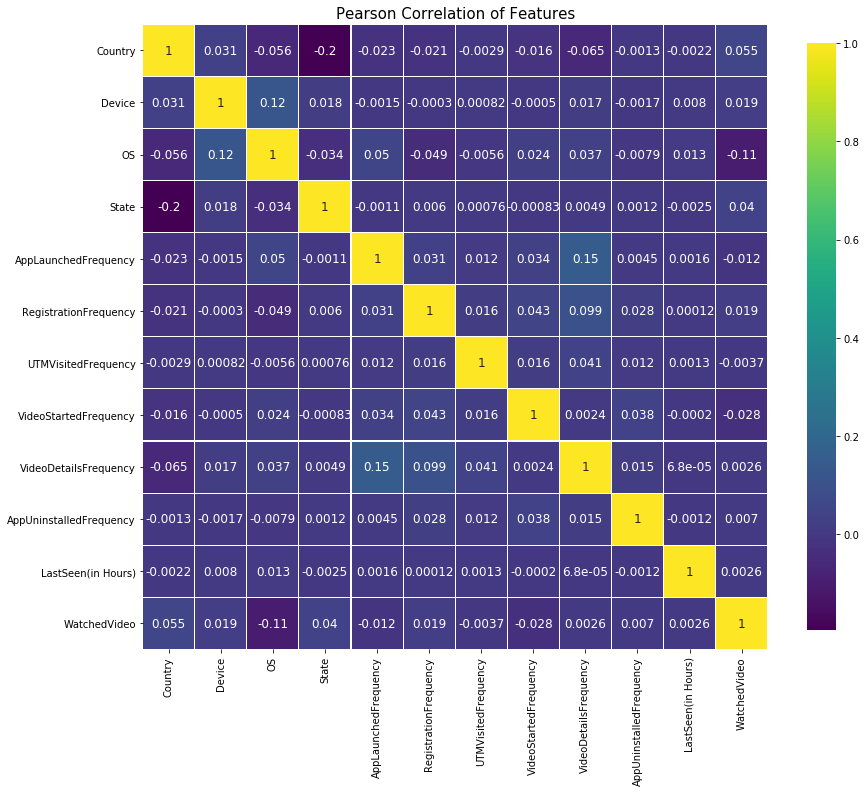

In [6]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(data.iloc[:,:-1])

# Code Ends Here

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,recall_score,f1_score,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# from mlxtend.classifier import StackingClassifier

In [8]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
data_encode = dummyEncode(data)
data_encode.head()

,UserId,Category,Country,Device,Genre,OS,ProgramType,State,AppLaunchedFrequency,RegistrationFrequency,UTMVisitedFrequency,VideoStartedFrequency,VideoDetailsFrequency,AppUninstalledFrequency,LastSeen(in Hours),LastEvent(in 48H),WatchedVideo,WatchedVideo(in 48H)
0,0,1,1,1,15,1,6,36,14.0,1.0,4.0,1.0,5.0,1.0,0,1,1,1
1,1,1,40,1,9,1,4,33,4.0,1.0,1.0,1.0,4.0,1.0,0,1,1,1
2,2,1,40,2,4,1,6,33,1.0,1.0,2.0,1.0,4.0,1.0,0,1,1,1
3,3,1,1,1,15,2,5,35,9.0,1.0,1.0,9.0,4.0,1.0,0,1,0,0
4,4,0,1,1,4,1,2,40,10.0,1.0,1.0,9.0,17.0,1.0,0,1,1,1


In [9]:
X = data_encode.iloc[:,:-1]
y = data_encode.iloc[:,-1]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

# Models

In [11]:
# !pip install xgboost

In [12]:
def run_model(X_train, y_train,X_test,y_test,model):
    
    #X_train,X_test,y_train,y_test = train_test_split(predictor_train,target_train,test_size=0.2,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(y_pred.shape)
    print(model)
    print('Precision is',precision_score(y_test, y_pred))
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print('F1 score:',f1_score(y_test,y_pred))
    print('Recall Score:',recall_score(y_test,y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    print('Confusion Matrix:\n')
    print(tp,fp)
    print(fn,tn)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return y_pred

# Vanilla Models

              precision    recall  f1-score   support

           0       0.44      0.18      0.25      6416
           1       0.87      0.96      0.91     35790

    accuracy                           0.84     42206
   macro avg       0.65      0.57      0.58     42206
weighted avg       0.80      0.84      0.81     42206

ROC_AUC_SCORE is 0.567540124785828


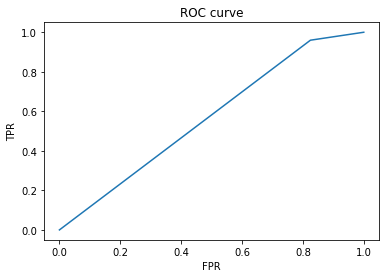

AUC Score = 56.75 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6416
           1       1.00      1.00      1.00     35790

    accuracy                           1.00     42206
   macro avg       1.00      1.00      1.00     42206
weighted avg       1.00      1.00      1.00     42206

ROC_AUC_SCORE is 1.0


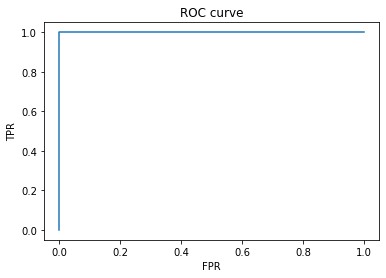

AUC Score = 100.00 %
On Model - 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6416
           1       1.00      1.00      1.00     35790

    accuracy                           1.00     42206
   macro avg       1.00      1.00      1.00     42206
weighted avg       1.00      1.00      1.00     42206

ROC_AUC_SCORE is 0.9998441396508728


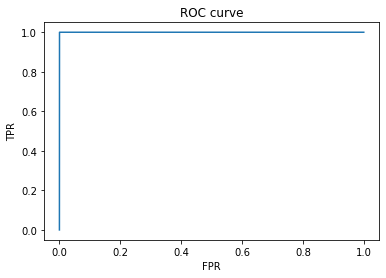

AUC Score = 99.98 %
On Model - 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6416
           1       1.00      1.00      1.00     35790

    accuracy                           1.00     42206
   macro avg       1.00      1.00      1.00     42206
weighted avg       1.00      1.00      1.00     42206

ROC_AUC_SCORE is 1.0


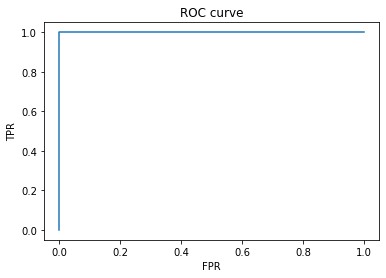

AUC Score = 100.00 %
On Model - 
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6416
           1       1.00      1.00      1.00     35790

    accuracy                           1.00     42206
   macro avg       1.00      1.00      1.00     42206
weighted avg       1.00      1.00      1.00     42206

ROC_AUC_SCORE is

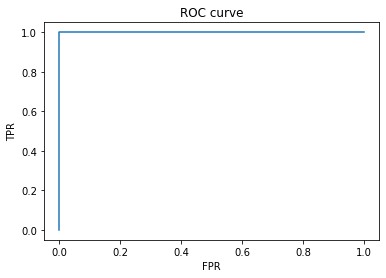

AUC Score = 100.00 %
On Model - 
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [13]:
def run_model(predictor_train,target_train, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictor_train,target_train,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc

models = [LogisticRegression,DecisionTreeClassifier, RandomForestClassifier,XGBClassifier,GradientBoostingClassifier]
for model in models:
    # run model
    model = model()
    auc = run_model(X_train, y_train, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(model))
    print('===='*20)

# Observation
1. Data Leakage thorugh some features.
2. Dropping the Features with high correlation to target variable will stop the leakage.

Highly Correlated Variables


Category              ProgramType             0.903809
ProgramType           Category                0.903809
WatchedVideo(in 48H)  WatchedVideo            0.999912
WatchedVideo          WatchedVideo(in 48H)    0.999912
dtype: float64

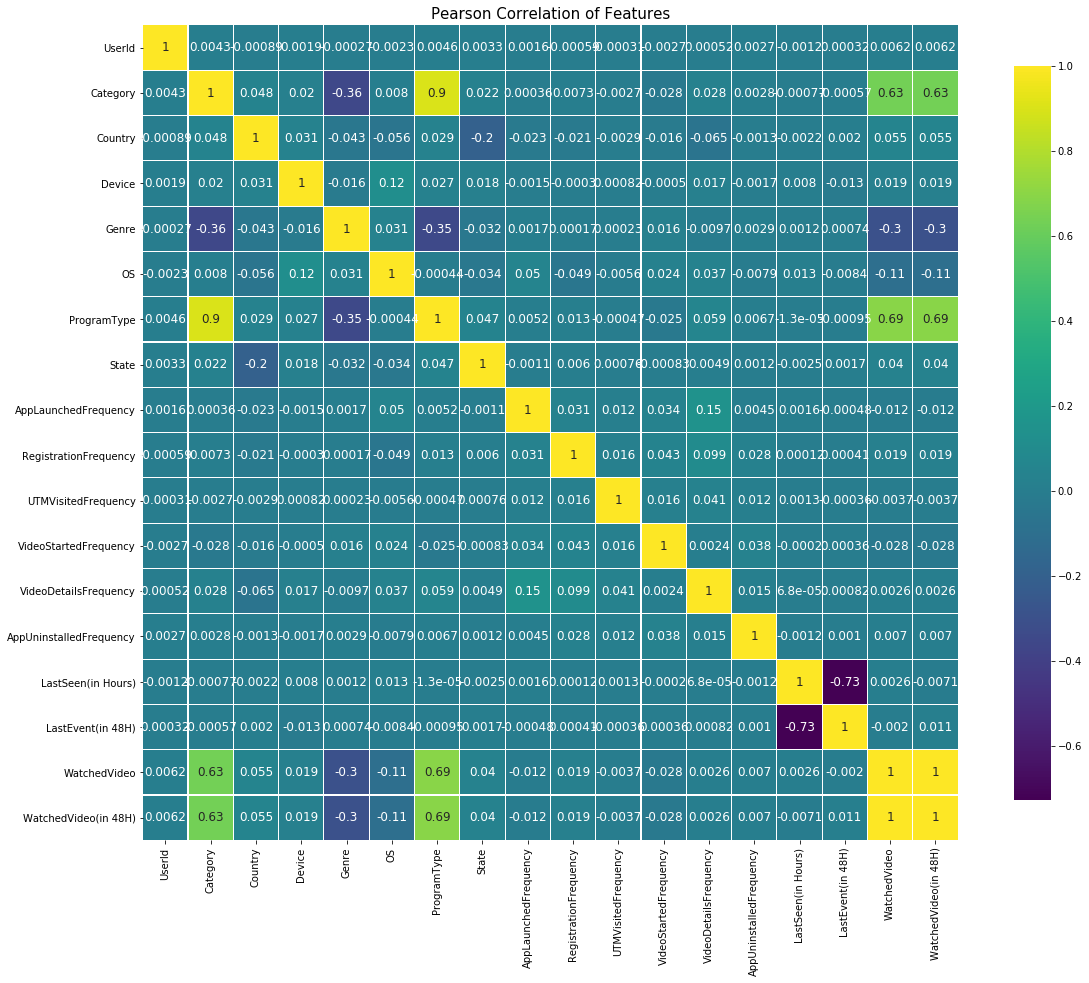

In [16]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(data)

# Code Ends Here